### Визуализация данных

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML5.4%20EDA/titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Визуализация отсутствующих значений

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

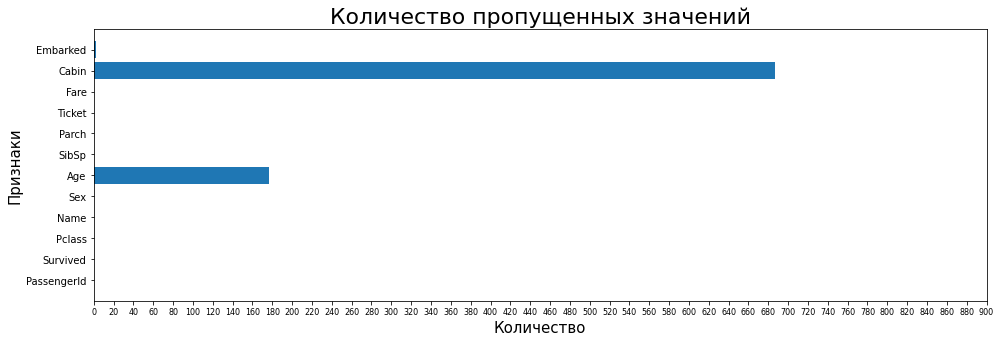

In [11]:
fig = plt.figure(figsize=(16,5))
plt.barh(df.columns,df.isna().sum().values, align='center')
plt.title("Количество пропущенных значений", fontsize=22)
plt.xlabel('Количество', fontsize=15)
plt.ylabel('Признаки', fontsize=15)
plt.xticks(np.arange(0, df.shape[0]+20, 20), fontsize=8);

В признаке `Cabin` слишком много пропусков, его следует удалить. 

### Визуализация числа уникальных значений

In [12]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

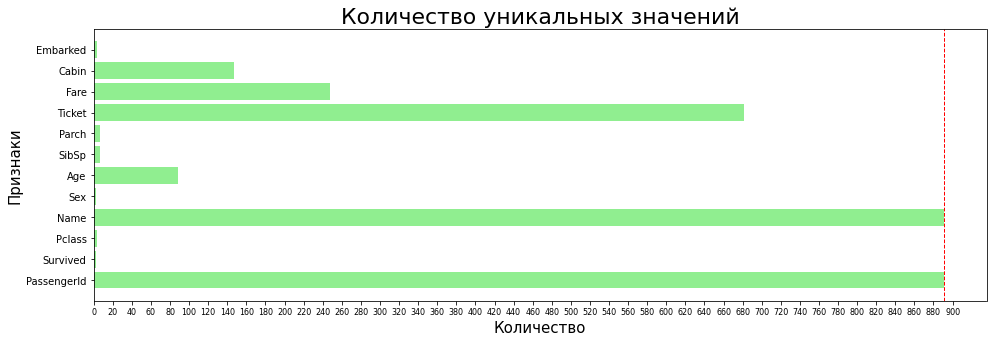

In [15]:
fig = plt.figure(figsize=(16,5))
ax=fig.subplots() 
ax.axvline(x=df.shape[0], color='r', label='Average', linestyle='--', linewidth=1)
plt.barh(df.columns,df.nunique(), align='center',color='lightgreen')
plt.title("Количество уникальных значений", fontsize=22)
plt.xlabel('Количество', fontsize=15)
plt.ylabel('Признаки', fontsize=15)
plt.xticks(np.arange(0, df.shape[0]+20, 20), fontsize=8);

В колонках `PassengerId`,`Name` все значения уникальные, а в `Ticket` их очень много, поэтому следует удалить эти три столбика.

In [16]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [17]:
df['Age'].sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [18]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [19]:
df.dropna(inplace=True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Изучим структуру целевой переменной:

In [21]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

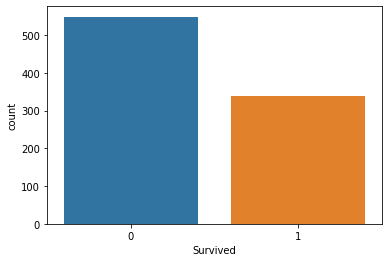

In [22]:
sns.countplot(x=df['Survived'], data=df);

Выжило меньше, чем погибло людей.

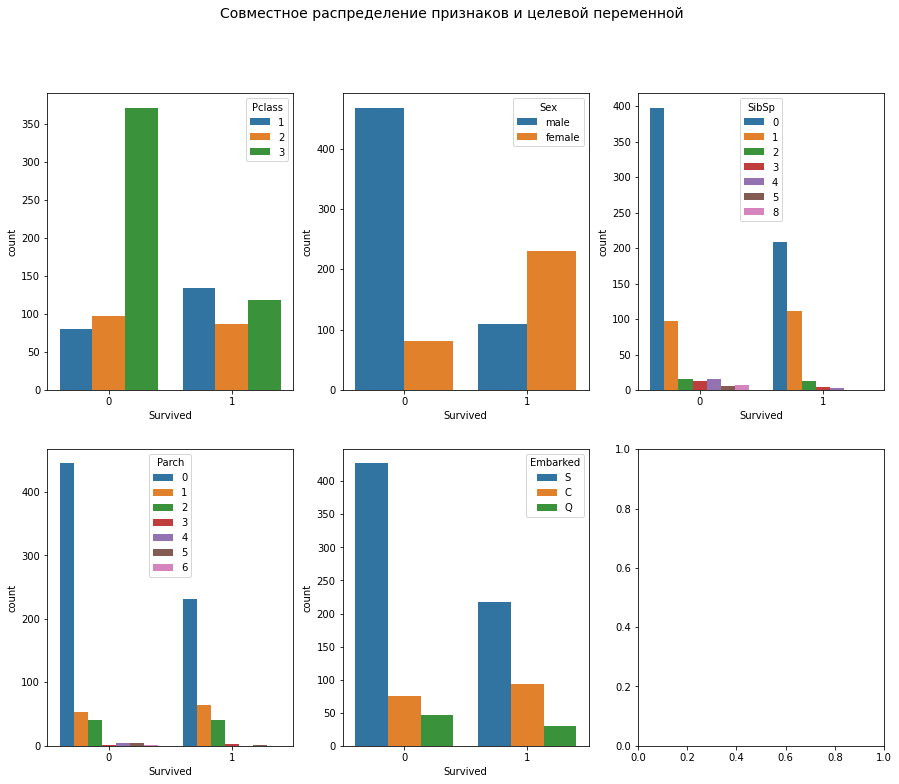

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(15,12))
axes = ax.ravel()
fig.suptitle('Cовместное распределение признаков и целевой переменной', fontsize=14)
for i, feature in enumerate(['Pclass','Sex','SibSp','Parch','Embarked' ]):
    sns.countplot(x='Survived',data=df,  ax=axes[i],hue=feature )
#fig.subplots_adjust(hspace=0.5,wspace=0.5);
plt.show()

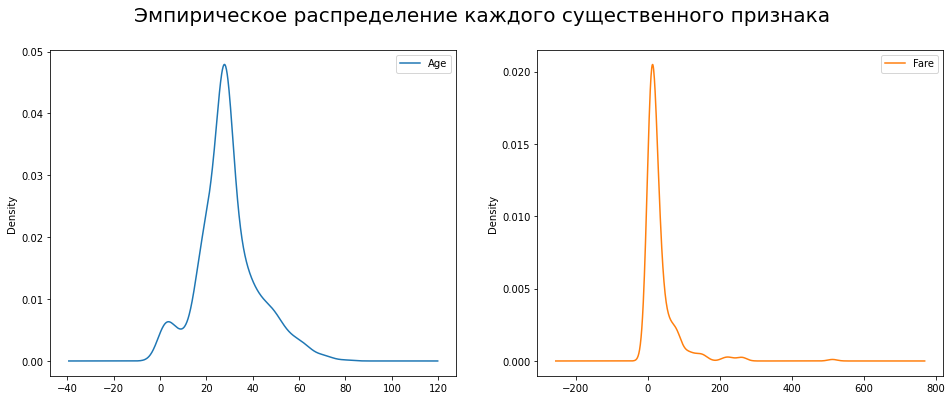

In [27]:
df[['Age','Fare']].plot(kind='kde', subplots=True, layout=(1, 2), sharex=False, figsize=(16, 6))
plt.suptitle('Эмпирическое распределение каждого существенного признака',fontsize=20);

Напоминают нормальное распределение.

In [28]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [29]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


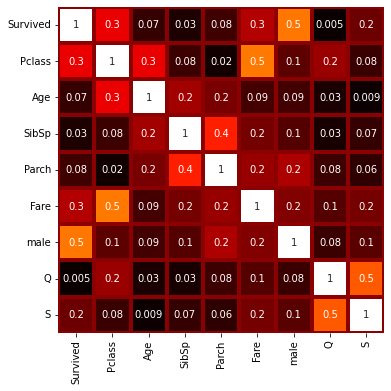

In [30]:
df_corr = df.corr().abs()
f=plt.figure(figsize=(6,6))
corr_matrix = sns.heatmap(
            df_corr, 
            annot = True, 
            fmt = '.1g', 
            cmap = 'hot', 
            linewidths = 4, 
            linecolor = 'darkred',
            cbar = False, 
            square = True, 
            xticklabels = df_corr.columns, 
            yticklabels = df_corr.columns);

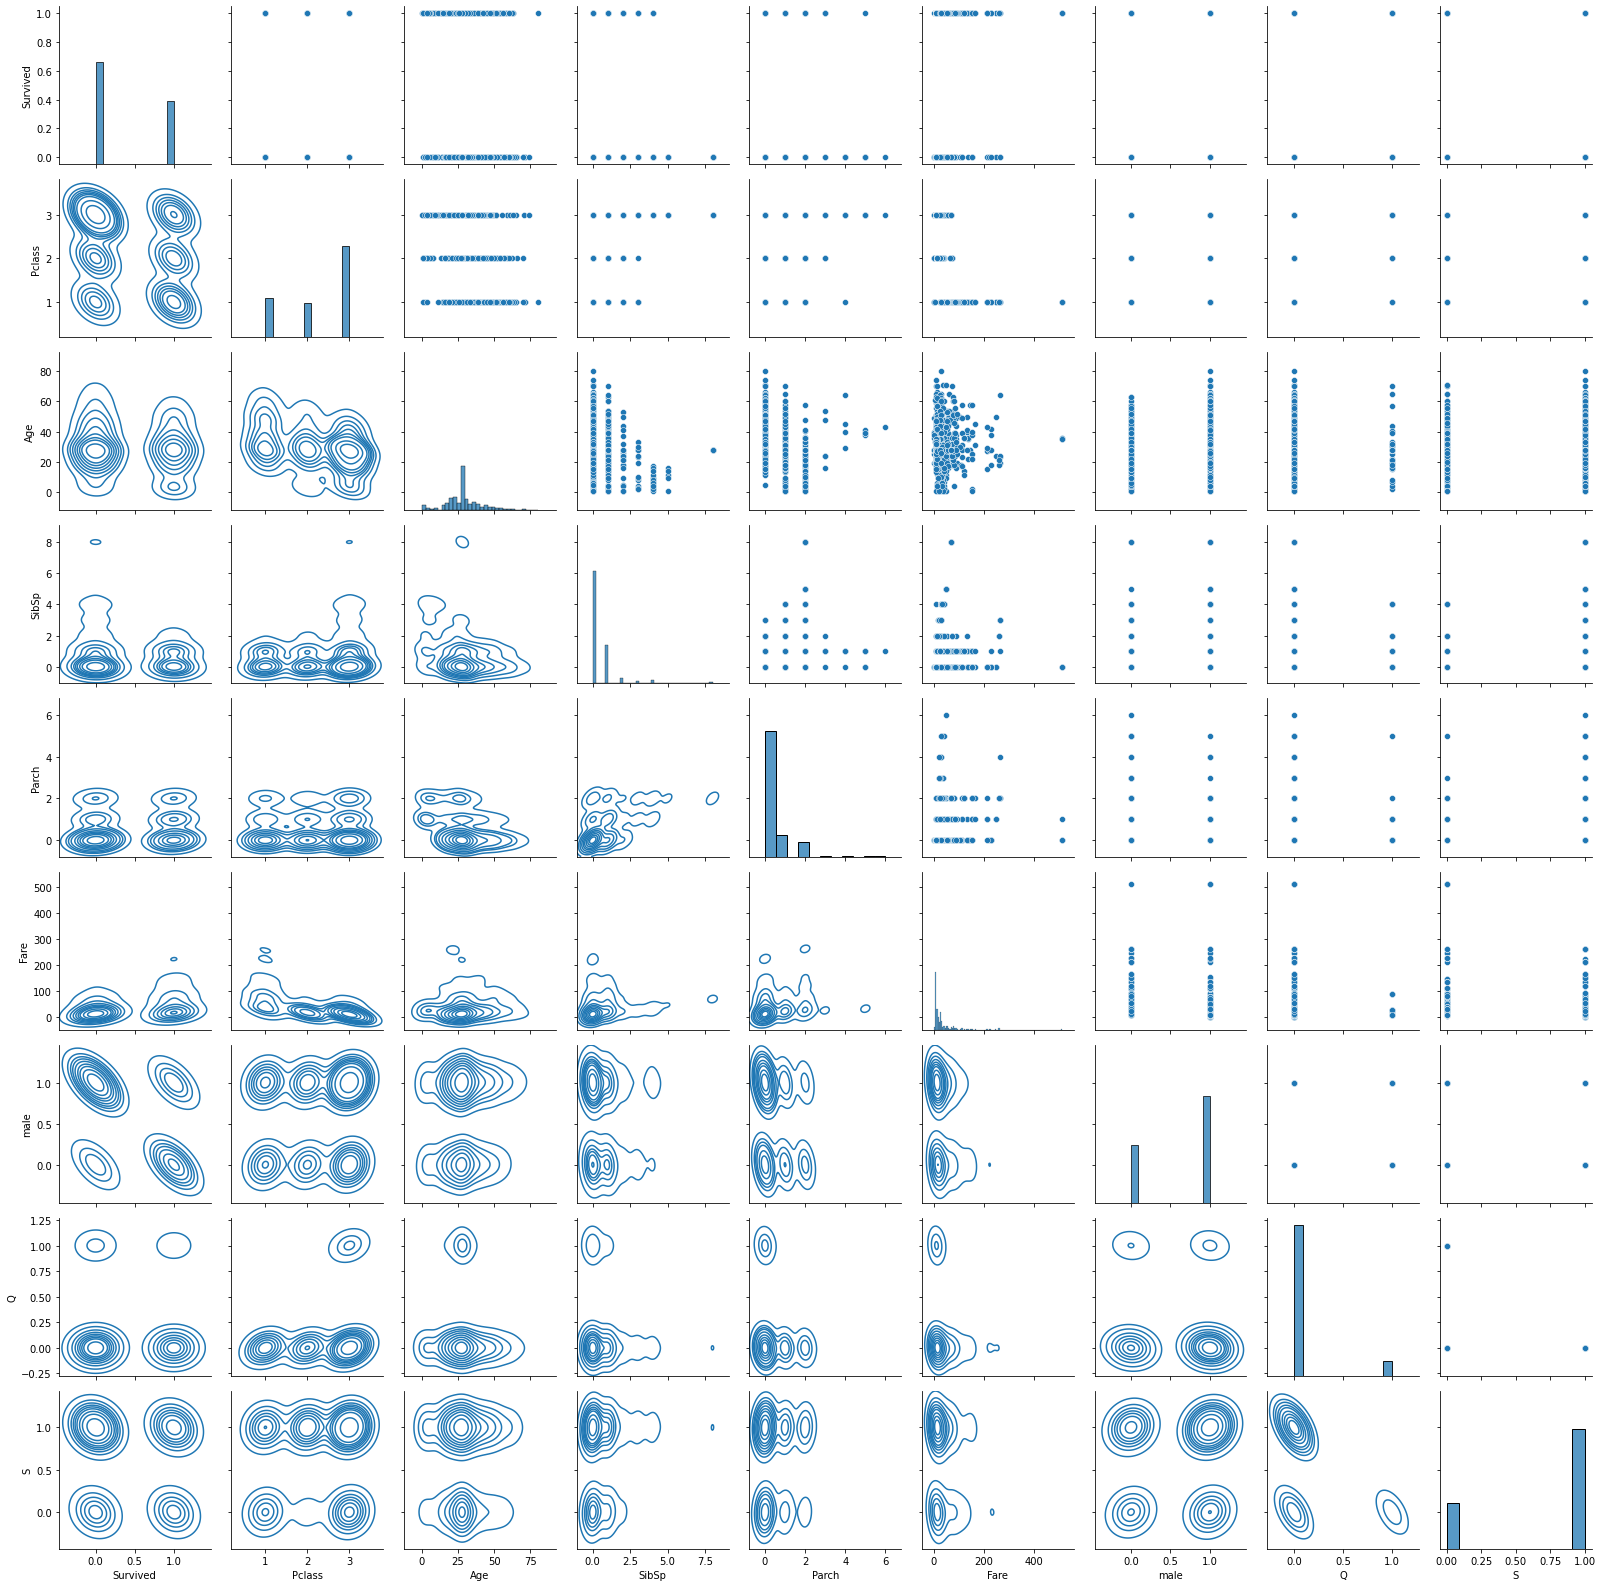

In [31]:
g = sns.PairGrid(df)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot);

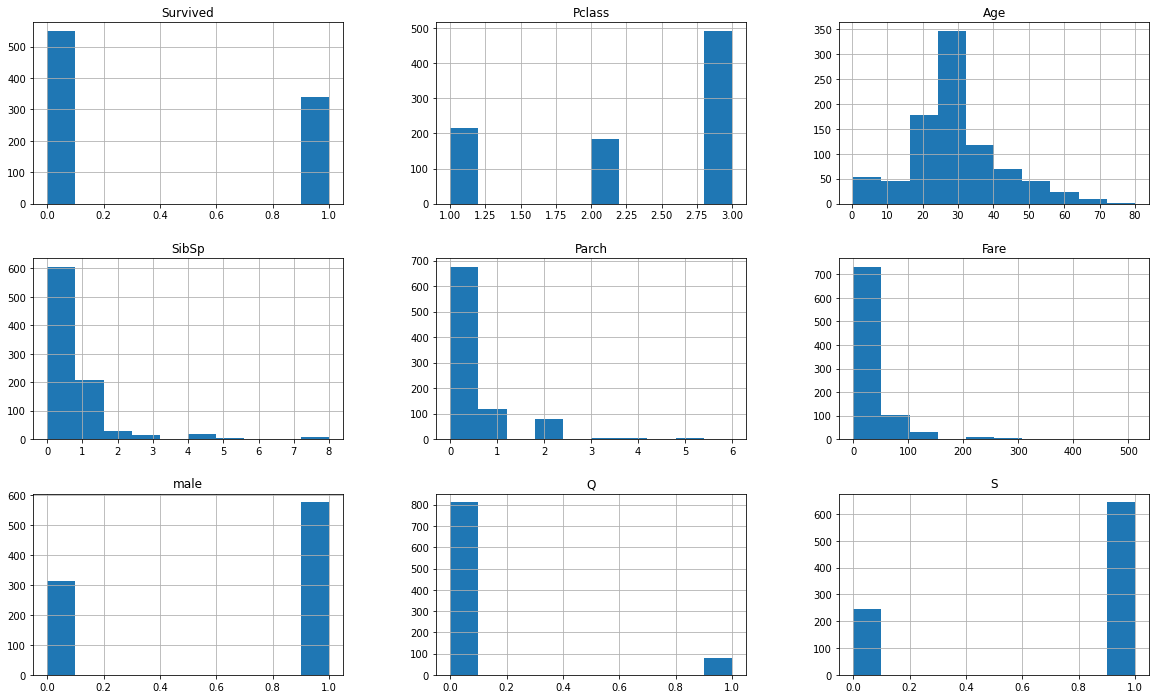

In [32]:
df[df.columns].hist(figsize=(20,12));

Можно заподозрить выбросы в Fare:

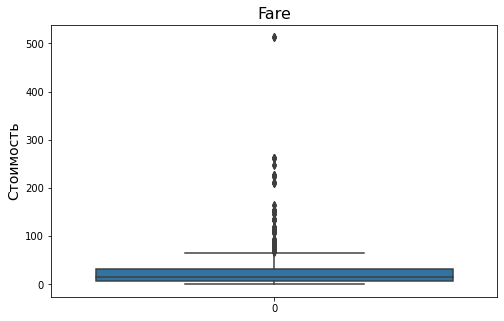

In [34]:
plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(data=df['Fare'])
boxplot.axes.set_title('Fare', fontsize=16)
boxplot.set_ylabel('Стоимость', fontsize=14);